In [1]:
# Dependencies
import requests
import json
import pandas as pd
from pprint import pprint
from datetime import datetime
import matplotlib.pyplot as plt
from config import bea_key
import numpy as np

In [2]:
##################################################################
## Define function to build different API calls
## when using, pass geography code, line codes and years from BEA
##################################################################

def api_url_builder(api_geo, api_codes, api_years):

    base_url = "https://apps.bea.gov/api/data/?&method=GetData&DataSetName=Regional&TableName=SAPCE3&ResultFormat=JSON"
    api_key = bea_key
    geo_fips = f"&GeoFips={api_geo}"
    line_code = f"&LineCode={api_codes}"
    api_years = f"&year={api_years}"
    
    api_url = f"{base_url}{geo_fips}{line_code}{api_years}&UserID={api_key}"
    
    return api_url



# Looking at Major Category Spend across US
In this area, we examine the spend in the US across the macro categories of Durable Goods, Nondurable Goods and Service spend in millions of dollars (USD) from 217-2021

In [3]:

# Ping API for US data for all linecodes from 2017-2021
url = api_url_builder('00000','ALL','2017,2018,2019,2020,2021')

# Get JSON response
response = requests.get(url).json()


In [4]:
# Set up lists to hold response data
geo = []
desc = []
year = []
spend = []
line_code = []

response_list = response["BEAAPI"]["Results"]["Data"]

for each in response_list:
    geo.append(each["GeoName"])
    desc.append(each["Description"])
    year.append(each["TimePeriod"])
    
    # Change spend from string to number and remove commas
    spend_value = (each["DataValue"].replace(",",""))
    spend.append(float(spend_value))
    
    
    # Split the code into prefix and return just line number for filtering
    code = (each["Code"]).split("-")
    line_code.append(code[1])

In [5]:
# create a data frame from api info
spend_dict = {
    "Code": line_code,
    "State": geo,
    "Year": year,
    "Desc": desc,
    "Spend": spend    
}

spend_data = pd.DataFrame(spend_dict)

spend_data.sort_values('Code')



,Code,State,Year,Desc,Spend
464,1,United States,2021,Personal consumption expenditures,15902575.3
352,1,United States,2020,Personal consumption expenditures,14116165.7
240,1,United States,2019,Personal consumption expenditures,14392721.0
128,1,United States,2018,Personal consumption expenditures,13904979.5
16,1,United States,2017,Personal consumption expenditures,13233608.6
...,...,...,...,...,...
553,99,United States,2021,Internet access,81499.3
329,99,United States,2019,Internet access,73984.2
441,99,United States,2020,Internet access,76360.3
105,99,United States,2017,Internet access,72460.4


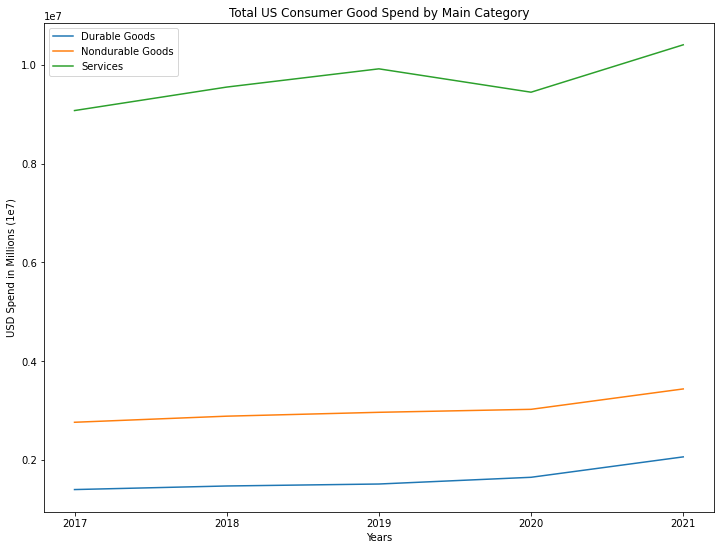

In [6]:
# Pull data for just the macro categories by line code

durable_goods = spend_data.loc[spend_data['Code']=='3']
nondurable_goods = spend_data.loc[spend_data['Code']=='25']
services = spend_data.loc[spend_data['Code']=='47']

# Plot the data

x_axis1 = durable_goods['Year']
y_axis1 = durable_goods['Spend']

x_axis2 = nondurable_goods['Year']
y_axis2 = nondurable_goods['Spend']

x_axis3 = services['Year']
y_axis3 = services['Spend']

plt.figure(figsize=(12,9))
plt.title("Total US Consumer Good Spend by Main Category")
plt.plot(x_axis1, y_axis1, label="Durable Goods")
plt.plot(x_axis2, y_axis2, label="Nondurable Goods")
plt.plot(x_axis3, y_axis3, label="Services")
plt.ylabel("USD Spend in Millions (1e7)")
plt.xlabel("Years")
plt.legend(loc="best")

plt.show()



In [7]:
#Calculate 2020 changes

#Durable Goods
durable_start = durable_goods.loc[durable_goods['Year']=="2019"]['Spend']
durable_end = durable_goods.loc[durable_goods['Year']=="2020"]['Spend']

durable_yoy = round(((int(durable_end)/int(durable_start))-1) * 100)


# Nondurable Goods
nondurable_start = nondurable_goods.loc[nondurable_goods['Year']=="2019"]['Spend']
nondurable_end = nondurable_goods.loc[nondurable_goods['Year']=="2020"]['Spend']

nondurable_yoy = round(((int(nondurable_end)/int(nondurable_start))-1) * 100)

#Services
services_start = services.loc[services['Year']=="2019"]['Spend']
services_end = services.loc[services['Year']=="2020"]['Spend']

services_yoy = round(((int(services_end)/int(services_start))-1) * 100)

print("Changes in spend 2019-2020")
print(f" Durable Goods: {durable_yoy}% \n Nondurable Goods: {nondurable_yoy}% \n Services: {services_yoy}%")

Changes in spend 2019-2020
 Durable Goods: 9% 
 Nondurable Goods: 2% 
 Services: -5%


In [8]:
#Calculate 2021 changes

#Durable Goods
durable_start = durable_goods.loc[durable_goods['Year']=="2020"]['Spend']
durable_end = durable_goods.loc[durable_goods['Year']=="2021"]['Spend']

durable_yoy = round(((int(durable_end)/int(durable_start))-1) * 100)


# Nondurable Goods
nondurable_start = nondurable_goods.loc[nondurable_goods['Year']=="2020"]['Spend']
nondurable_end = nondurable_goods.loc[nondurable_goods['Year']=="2021"]['Spend']

nondurable_yoy = round(((int(nondurable_end)/int(nondurable_start))-1) * 100)

#Services
services_start = services.loc[services['Year']=="2020"]['Spend']
services_end = services.loc[services['Year']=="2021"]['Spend']

services_yoy = round(((int(services_end)/int(services_start))-1) * 100)

print("Changes in spend 2020-2021")
print(f" Durable Goods: {durable_yoy}% \n Nondurable Goods: {nondurable_yoy}% \n Services: {services_yoy}%")


Changes in spend 2020-2021
 Durable Goods: 25% 
 Nondurable Goods: 14% 
 Services: 10%


# Consumer Good Spend by Region




![Map of Regions](https://www.researchgate.net/profile/David-Fleming-Munoz/publication/241750446/figure/fig2/AS:298550341718017@1448191356869/Economic-Regions-Bureau-of-Economic-Analysis.png "Map of Regions")

Multifunctional Agriculture and Farm Viability in the United States - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Economic-Regions-Bureau-of-Economic-Analysis_fig2_241750446 [accessed 15 Feb, 2023]

In [10]:
######################################
## Create a list of Regions
######################################

regions = ['New England', 'Mideast', 'Great Lakes', 'Plains', 'Southeast', 'Southwest', 'Rocky Mountain', 'Far West']

In [23]:
## Get info for Regions


# Ping API for US data for all linecodes from 2017-2021
url = api_url_builder('STATE','2','2019,2020,2021')

# Get JSON response
response = requests.get(url).json()

# Set up lists to hold response data
geo = []
year = []
spend = []
line_code = []

response_list = response["BEAAPI"]["Results"]["Data"]

for each in response_list:
    geo.append(each["GeoName"])
    year.append(each["TimePeriod"])
    
    # Change spend from string to number and remove commas
    spend_value = (each["DataValue"].replace(",",""))
    spend.append(float(spend_value))
    
    
    # Split the code into prefix and return just line number for filtering
    code = (each["Code"]).split("-")
    line_code.append(code[1])

In [24]:
# create a data frame from info
spend_dict = {
    "Year": year,
    "Code": line_code,
    "State": geo,
    "Spend": spend    
}

spend_data = pd.DataFrame(spend_dict)

#spend_data.sort_values('Year')


# Sorting by year
spend_data = spend_data.sort_values(by=['Year'])

spend_data.head()

,Year,Code,State,Spend
0,2019,2,United States,4473509.9
108,2019,2,Ohio,154008.9
107,2019,2,North Dakota,10688.9
102,2019,2,North Carolina,140807.2
101,2019,2,New York,283047.5


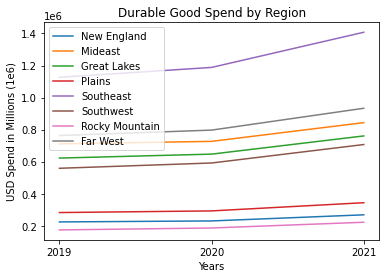

In [25]:
######################################
## Plot Durable Goods by Region
######################################


#Loop through regions and plot
for region in regions:
    x_axis = spend_data.loc[spend_data['State']==region]['Year']
    y_axis = spend_data.loc[spend_data['State']==region]['Spend']
    plt.plot(x_axis, y_axis, label=region)    


plt.title("Durable Good Spend by Region")
plt.legend(loc="upper left")
plt.ylabel("USD Spend in Millions (1e6)")
plt.xlabel("Years")
plt.show()

In [26]:
#Calculate 2021 changes

print(f"The Regional Change 2020-2021 for Durable Goods")


#Durable Goods
for region in regions:
    spend_data_filtered = spend_data.loc[spend_data['State']==region]
    spend_start = spend_data_filtered.loc[spend_data_filtered['Year']=="2020"]['Spend']
    spend_end = spend_data_filtered.loc[spend_data_filtered['Year']=="2021"]['Spend']

    spend_yoy = round(((int(spend_end)/int(spend_start))-1) * 100)

    print(f"{region}:{spend_yoy}%")
    

The Regional Change 2020-2021 for Durable Goods
New England:17%
Mideast:16%
Great Lakes:18%
Plains:17%
Southeast:18%
Southwest:19%
Rocky Mountain:19%
Far West:17%


# Nondurable Good Spend by Region

In [27]:
## Get info for Regions


# Ping API for US data for all linecodes from 2017-2021
url = api_url_builder('STATE','26','2019,2020,2021')

# Get JSON response
response = requests.get(url).json()

# Set up lists to hold response data
geo = []
year = []
spend = []
line_code = []

response_list = response["BEAAPI"]["Results"]["Data"]

for each in response_list:
    geo.append(each["GeoName"])
    year.append(each["TimePeriod"])
    
    # Change spend from string to number and remove commas
    spend_value = (each["DataValue"].replace(",",""))
    spend.append(float(spend_value))
    
    
    # Split the code into prefix and return just line number for filtering
    code = (each["Code"]).split("-")
    line_code.append(code[1])

In [28]:
# create a data frame from info
spend_dict = {
    "Year": year,
    "Code": line_code,
    "State": geo,
    "Spend": spend    
}

spend_data = pd.DataFrame(spend_dict)

#spend_data.sort_values('Year')


# Sorting by year
spend_data = spend_data.sort_values(by=['Year'])


spend_data.head()

,Year,Code,State,Spend
0,2019,26,United States,1030816.8
108,2019,26,Ohio,37712.7
107,2019,26,North Dakota,2281.8
102,2019,26,North Carolina,31942.9
101,2019,26,New York,62591.2


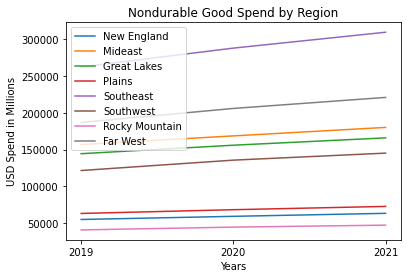

In [29]:
######################################
## Plot Nondurable Goods by Region
######################################

# Loop through regions and plot
for region in regions:
    x_axis = spend_data.loc[spend_data['State']==region]['Year']
    y_axis = spend_data.loc[spend_data['State']==region]['Spend']
    plt1 = plt.plot(x_axis, y_axis, label=region)
    


plt.title("Nondurable Good Spend by Region")
plt.legend(loc="upper left")
plt.ylabel("USD Spend in Millions")
plt.xlabel("Years")
plt.show()

# Service Spend by Region

In [30]:
## Get info for Regions


# Ping API for US data for all linecodes from 2017-2021
url = api_url_builder('STATE','47','2019,2020,2021')

# Get JSON response
response = requests.get(url).json()

# Set up lists to hold response data
geo = []
year = []
spend = []
line_code = []

response_list = response["BEAAPI"]["Results"]["Data"]

for each in response_list:
    geo.append(each["GeoName"])
    year.append(each["TimePeriod"])
    
    # Change spend from string to number and remove commas
    spend_value = (each["DataValue"].replace(",",""))
    spend.append(float(spend_value))
    
    
    # Split the code into prefix and return just line number for filtering
    code = (each["Code"]).split("-")
    line_code.append(code[1])
    

In [31]:
# create a data frame from info
spend_dict = {
    "Year": year,
    "Code": line_code,
    "State": geo,
    "Spend": spend    
}

spend_data = pd.DataFrame(spend_dict)



# Sorting by year
spend_data = spend_data.sort_values(by=['Year'])


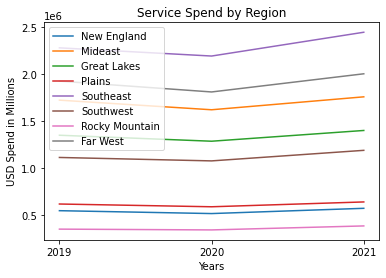

In [32]:
######################################
## Plot Services Spend by Region
######################################

# Loop through regions and plot
for region in regions:
    x_axis = spend_data.loc[spend_data['State']==region]['Year']
    y_axis = spend_data.loc[spend_data['State']==region]['Spend']
    plt.plot(x_axis, y_axis, label=region)


    
plt.title("Service Spend by Region")    
plt.legend(loc="upper left")
plt.ylabel("USD Spend in Millions")
plt.xlabel("Years")
plt.show()

# US Spend by sub-categories

For this, we wll look at a variety of subcategories within the larger categories of durable goods, nondurable goods and services. Codes for the categories observed will be in the comments for each section.

In [13]:
######################################
## Create DF to pull groups from 
## Data not from API, from CSV
######################################

consumer_spend_bycat = pd.read_csv('ConsumerSpend/US_consumer_spend_change.csv')

# Create df from load
consumer_spend_bycat_df = pd.DataFrame(consumer_spend_bycat)
consumer_spend_bycat_df = consumer_spend_bycat_df[['LineCode', 'Description','2019-2020','2020-2021']]
consumer_spend_bycat_df = consumer_spend_bycat_df.set_index(consumer_spend_bycat_df['LineCode'], drop=True)
consumer_spend_bycat_df = consumer_spend_bycat_df.drop(['LineCode'], axis=1)

consumer_spend_bycat_df = consumer_spend_bycat_df.astype({'2019-2020':'float', '2020-2021':'float'})

consumer_spend_bycat_df.head()



,Description,2019-2020,2020-2021
LineCode,,,
1,Personal consumption expenditures,-1.9,12.7
2,Goods,4.4,17.7
3,Durable goods,9.0,25.1
4,Motor vehicles and parts,3.3,29.0
5,New motor vehicles,2.5,20.0


## Spend in Durable Good Sub-Categories

In [14]:
######################################
## Durable Goods Spend by subcategories
## Line codes - 5,6,9,10,14,15,21,24
## Data not from API, from CSV
######################################

durable_goods_codes = [4,5,8,9,13,14,20,23]


durable_goods_df = consumer_spend_bycat_df.iloc[durable_goods_codes]

covid_low = durable_goods_df['2019-2020'].min()
covid_cat_low = durable_goods_df.loc[durable_goods_df['2019-2020'] == covid_low]


covid_high = durable_goods_df['2019-2020'].max()
covid_cat_high = durable_goods_df.loc[durable_goods_df['2019-2020'] == covid_high]


recovery_low = durable_goods_df['2020-2021'].min()
recovery_cat_low = durable_goods_df.loc[durable_goods_df['2020-2021'] == recovery_low]

recovery_high = durable_goods_df['2020-2021'].max()
recovery_cat_high = durable_goods_df.loc[durable_goods_df['2020-2021'] == recovery_high]


print("----------------------------------------------------------------")
print("2020 Covid Impact")
print(f"{covid_cat_low['Description'].item()} dropped the most during Covid by {covid_low}% YoY")
print(f"{covid_cat_high['Description'].item()} gained the most during Covid by {covid_high}% YoY")
print("----------------------------------------------------------------")
print("----------------------------------------------------------------")
print("2021 Covid Recovery")
print(f"{recovery_cat_low['Description'].item()} recovered the least by {recovery_low}% YoY")
print(f"{recovery_cat_high['Description'].item()} recovered the most by {recovery_high}% YoY")
print("----------------------------------------------------------------")


durable_goods_df

----------------------------------------------------------------
2020 Covid Impact
Telephone and related communication equipment dropped the most during Covid by -16.9% YoY
Sporting equipment, supplies, guns, and ammunition gained the most during Covid by 27.7% YoY
----------------------------------------------------------------
----------------------------------------------------------------
2021 Covid Recovery
Household appliances recovered the least by 17.6% YoY
Net purchases of used motor vehicles recovered the most by 50.6% YoY
----------------------------------------------------------------


,Description,2019-2020,2020-2021
LineCode,,,
5,New motor vehicles,2.5,20.0
6,Net purchases of used motor vehicles,5.0,50.6
9,Furniture and furnishings,16.6,21.8
10,Household appliances,10.1,17.6
14,"Video, audio, photographic, and information pr...",18.6,19.9
15,"Sporting equipment, supplies, guns, and ammuni...",27.7,23.0
21,Therapeutic appliances and equipment,-1.7,21.8
24,Telephone and related communication equipment,-16.9,21.3


## Spend in Nondurable Good Sub-Categories

In [15]:
######################################
## Nondurable Goods Spend by subcategories
## Line codes - 27,28,32,33, 40, 43, 44
## Data not from API, from CSV
######################################

non_durable_goods_codes = [26,27,31,32,29,42,43]


non_durable_goods_df = consumer_spend_bycat_df.iloc[non_durable_goods_codes]

covid_low = non_durable_goods_df['2019-2020'].min()
covid_cat_low = non_durable_goods_df.loc[non_durable_goods_df['2019-2020'] == covid_low]


covid_high = non_durable_goods_df['2019-2020'].max()
covid_cat_high = non_durable_goods_df.loc[non_durable_goods_df['2019-2020'] == covid_high]


recovery_low = non_durable_goods_df['2020-2021'].min()
recovery_cat_low = non_durable_goods_df.loc[non_durable_goods_df['2020-2021'] == recovery_low]

recovery_high = non_durable_goods_df['2020-2021'].max()
recovery_cat_high = non_durable_goods_df.loc[non_durable_goods_df['2020-2021'] == recovery_high]


print("----------------------------------------------------------------")
print("2020 Covid Impact")
print(f"{covid_cat_low['Description'].item()} dropped the most during Covid by {covid_low}% YoY")
print(f"{covid_cat_high['Description'].item()} gained the most during Covid by {covid_high}% YoY")
print("----------------------------------------------------------------")
print("----------------------------------------------------------------")
print("2021 Covid Recovery")
print(f"{recovery_cat_low['Description'].item()} recovered the least by {recovery_low}% YoY")
print(f"{recovery_cat_high['Description'].item()} recovered the most by {recovery_high}% YoY")
print("----------------------------------------------------------------")


non_durable_goods_df

----------------------------------------------------------------
2020 Covid Impact
Women's and girls' clothing dropped the most during Covid by -11.4% YoY
Alcoholic beverages purchased for off-premises consumption gained the most during Covid by 12.8% YoY
----------------------------------------------------------------
----------------------------------------------------------------
2021 Covid Recovery
Tobacco recovered the least by 3.5% YoY
Women's and girls' clothing recovered the most by 29.4% YoY
----------------------------------------------------------------


,Description,2019-2020,2020-2021
LineCode,,,
27,Food and nonalcoholic beverages purchased for ...,8.7,7.0
28,Alcoholic beverages purchased for off-premises...,12.8,6.9
32,Women's and girls' clothing,-11.4,29.4
33,Men's and boys' clothing,-9.9,28.9
30,Clothing and footwear,-9.9,28.7
43,Personal care products,3.7,14.8
44,Tobacco,3.7,3.5


## Spend in Services Sub-Categories

In [16]:
######################################
## Service Spend by subcategories
## Line codes - 56,57,61,62,63,77,79,97,99
## Data not from API, from CSV
######################################

services_codes = [55,56,60,61,62,76,78,96,98]


services_df = consumer_spend_bycat_df.iloc[services_codes]

covid_low = services_df['2019-2020'].min()
covid_cat_low = services_df.loc[services_df['2019-2020'] == covid_low]


covid_high = services_df['2019-2020'].max()
covid_cat_high = services_df.loc[services_df['2019-2020'] == covid_high]


recovery_low = services_df['2020-2021'].min()
recovery_cat_low = services_df.loc[services_df['2020-2021'] == recovery_low]

recovery_high = services_df['2020-2021'].max()
recovery_cat_high = services_df.loc[services_df['2020-2021'] == recovery_high]


print("----------------------------------------------------------------")
print("2020 Covid Impact")
print(f"{covid_cat_low['Description'].item()} dropped the most during Covid by {covid_low}% YoY")
print(f"{covid_cat_high['Description'].item()} gained the most during Covid by {covid_high}% YoY")
print("----------------------------------------------------------------")
print("----------------------------------------------------------------")
print("2021 Covid Recovery")
print(f"{recovery_cat_low['Description'].item()} recovered the least by {recovery_low}% YoY")
print(f"{recovery_cat_high['Description'].item()} recovered the most by {recovery_high}% YoY")
print("----------------------------------------------------------------")


services_df

----------------------------------------------------------------
2020 Covid Impact
Membership clubs, sports centers, parks, theaters, and museums dropped the most during Covid by -47.3% YoY
Internet access gained the most during Covid by 3.2% YoY
----------------------------------------------------------------
----------------------------------------------------------------
2021 Covid Recovery
Water supply and sanitation recovered the least by 5.1% YoY
Gambling recovered the most by 37.3% YoY
----------------------------------------------------------------


,Description,2019-2020,2020-2021
LineCode,,,
56,Water supply and sanitation,0.1,5.1
57,Electricity and gas,0.3,7.5
61,Outpatient services,-5.0,10.0
62,Physician services,-4.8,9.1
63,Dental services,-16.5,14.4
77,"Membership clubs, sports centers, parks, theat...",-47.3,23.9
79,Gambling,-21.2,37.3
97,Telecommunication services,-0.6,6.6
99,Internet access,3.2,6.7


## Spend in Travel Sub-Categories

In [17]:
######################################
## Travel Spend by subcategories
## Line codes - 73,74,75,109,110
## Data not from API, from CSV
######################################

travel_codes = [72,73,74,107,108]


travel_df = consumer_spend_bycat_df.iloc[travel_codes]

covid_low = travel_df['2019-2020'].min()
covid_cat_low = travel_df.loc[travel_df['2019-2020'] == covid_low]


covid_high = travel_df['2019-2020'].max()
covid_cat_high = travel_df.loc[travel_df['2019-2020'] == covid_high]


recovery_low = travel_df['2020-2021'].min()
recovery_cat_low = travel_df.loc[travel_df['2020-2021'] == recovery_low]

recovery_high = travel_df['2020-2021'].max()
recovery_cat_high = travel_df.loc[travel_df['2020-2021'] == recovery_high]


print("----------------------------------------------------------------")
print("2020 Covid Impact")
print(f"{covid_cat_low['Description'].item()} dropped the most during Covid by {covid_low}% YoY")
print(f"{covid_cat_high['Description'].item()} gained the most during Covid by {covid_high}% YoY")
print("----------------------------------------------------------------")
print("----------------------------------------------------------------")
print("2021 Covid Recovery")
print(f"{recovery_cat_low['Description'].item()} recovered the least by {recovery_low}% YoY")
print(f"{recovery_cat_high['Description'].item()} recovered the most by {recovery_high}% YoY")
print("----------------------------------------------------------------")


travel_df

----------------------------------------------------------------
2020 Covid Impact
Foreign travel by U.S. residents dropped the most during Covid by -71.8% YoY
Water transportation gained the most during Covid by -39.3% YoY
----------------------------------------------------------------
----------------------------------------------------------------
2021 Covid Recovery
Less: Expenditures in the United States by nonresidents recovered the least by -2.8% YoY
Air transportation recovered the most by 94.9% YoY
----------------------------------------------------------------


,Description,2019-2020,2020-2021
LineCode,,,
73,Ground transportation,-47.7,28.4
74,Air transportation,-59.4,94.9
75,Water transportation,-39.3,19.3
109,Foreign travel by U.S. residents,-71.8,69.1
110,Less: Expenditures in the United States by non...,-63.1,-2.8


## Air Travel Spend (by Region)

In [18]:
# Ping API for state data for air travel
url = api_url_builder('STATE','74','2017,2018,2019,2020,2021')

# Get JSON response
response = requests.get(url).json()

# Set up lists to hold response data
geo = []
year = []
spend = []

response_list = response["BEAAPI"]["Results"]["Data"]

for each in response_list:
    geo.append(each["GeoName"])
    year.append(each["TimePeriod"])
    
    # Change spend from string to number and remove commas
    spend_value = (each["DataValue"].replace(",",""))
    spend.append(float(spend_value))
    
    
#     # Split the code into prefix and return just line number for filtering
#     code = (each["Code"]).split("-")
#     line_code.append(code[1])

In [19]:
# create a data frame from info
spend_dict = {
    "Year": year,
    #"Code": line_code,
    "State": geo,
    "Spend": spend    
}

spend_data = pd.DataFrame(spend_dict)

low_spend = spend_data.sort_values(by=['Year'])
low_spend.head()

,Year,State,Spend
0,2017,United States,97849.5
169,2017,New York,7693.2
160,2017,New Mexico,334.9
159,2017,New Jersey,3137.6
150,2017,New Hampshire,280.3


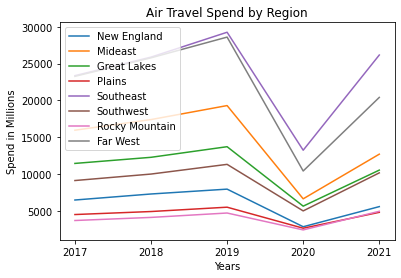

In [22]:
######################################
## Plot Low Spend by Region
######################################


for region in regions:
    x_axis = low_spend.loc[low_spend['State']==region]['Year']
    y_axis = low_spend.loc[low_spend['State']==region]['Spend']
    plt.plot(x_axis, y_axis, label=region)


    
plt.title("Air Travel Spend by Region")    
plt.legend(loc="upper left")
plt.ylabel("Spend in Millions")
plt.xlabel("Years")
plt.show()

In [21]:
######################################
## Travel by Region
######################################

#non_durable_goods_codes = [26,27,31,32,29,42,43]

#Calculate 2021 changes

print(f"2020 Change in Air Spend (in millions)")
print(f"----------------------------------------------------------------")



#Durable Goods
for region in regions:
    low_spend_filtered = low_spend.loc[low_spend['State']==region]
    spend_start = low_spend_filtered.loc[low_spend_filtered['Year']=="2019"]['Spend']
    spend_end = low_spend_filtered.loc[low_spend_filtered['Year']=="2020"]['Spend']

    spend_yoy = round(((int(spend_end)/int(spend_start))-1) * 100)

    print(f"{region} || 2019: {int(spend_start)} | 2020: {int(spend_end)} | Change:{spend_yoy}%")
    

2020 Change in Air Spend (in millions)
----------------------------------------------------------------
New England || 2019: 7958 | 2020: 2857 | Change:-64%
Mideast || 2019: 19296 | 2020: 6644 | Change:-66%
Great Lakes || 2019: 13716 | 2020: 5650 | Change:-59%
Plains || 2019: 5509 | 2020: 2657 | Change:-52%
Southeast || 2019: 29246 | 2020: 13239 | Change:-55%
Southwest || 2019: 11320 | 2020: 5004 | Change:-56%
Rocky Mountain || 2019: 4719 | 2020: 2425 | Change:-49%
Far West || 2019: 28586 | 2020: 10421 | Change:-64%
